### Problems with Deep Neural Nets:
1. Vanishing gradients and exploding gradients problem makes the lower layers very hard to train.
2. Large networks makes the training extremely slow.
3. There will be large number of hyper parameters to tune and these would severly risk overfitting the training set.

### Vanishing/Exploding Gradients Problems
1. The backpropagation algorithm works by going from the output layer to the input layer, propagating the error gradient on the way.
2. Once the algorithm has computed the gradient of the cost function with regards to each parameter in the network, it uses these gradients to update each parameter with a Gradient Descent step.
3. Sometimes, gradients often get smaller and smaller as the algorithm progresses down to the lower layers. As a result, the Gradient Descent update leaves the lower level layers connection weights virtually unchanged, and training never converges to a good solution. This is called *Vanishing Gradients problem*.
4. Sometimes, the opposite can happen: the gradients can grow bigger and bigger, so many layers get insanely large weight updates and the algorithm diverges. This is calle *Exploding Gradients problem*.
5. Generally, DNN suffer from unstable gradients; different layers may learn at widely different speeds.

### Reasons for this behavior:
1. Usage of logistic sigmoid activation function.
2. Weight initilization techniques such as random initilization using a mean of 0 and SD of 1.
3. Because of the combination of the above two reasons, the variance of the outputs of each layer is much greater than the variance of the inputs. Going forward, the variance keeps increasing after each layer until the activation fucntion saturates at the top layers. 

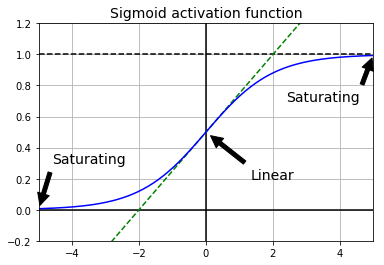

In [19]:
import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(-5, 5, 200)

def logit(z):
    return(1/(1+(np.exp(-z))))

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), 'b')
plt.axis([-5, 5, -0.2, 1.2])
plt.grid()
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.title("Sigmoid activation function", fontsize=14)
plt.show()

At higher positive and negative inputs, the function saturates at 0 or 1 and the gradient is 0 there. Thus when the backpropagation kicks in, there is virutually no gradient to propogate back through the network, and what little gradient exists keeps getting diluted as backpropagation progresses down through the top layers, so there is really nothing left for the lower layers.

### Xavier and He Initialization:

1. To avoid vanishing/exploding gradient problems, Glorot and Bengio proposed that we need the variance of the outputs of each layer to be equal variance before and after flowing through a layer in the reverse direction.
2. Xavier initilization considers both the number of input and output connections whose layer weights are being initialized.
3. He initilization considers only the number of input connections whose layer weights are being initialized.

### Nonsaturating Activation Functions:
1. 